In [1]:
#importaçoes
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

# Exercicio 1 

Explique a relaçao entre o algoritmo de relaxaçao e os metodos de Jacobi e Gauss-Seidel explicando detalhadamente as suas condiçoes de convergencia.

# Exercicio 2

Considere o circuito com n blocos representado na figura.

Caracterizado pelo sistema de equaçoes:
$$
\begin{cases}
V(\omega)=\frac{I_1}{i\omega C_1}+R_1(I_1-I_2)+i\omega L_1(I_1-I_A)\\
0=\frac{I_2}{i\omega C_2}+R_1(I_2-I_1)+R_2(I_2-I_3)+i\omega L_2(I_2-I_A)\\
\dots\\
0=\frac{I_n}{i\omega C_n}+R_{n-1}(I_n-I_{n-1})+R_nI_n+i\omega L_n(I_n-I_A)\\
0=i\omega L_1(I_A-I_1)+i\omega L_2(I_A-I_2)+\dots+i\omega L_n(I_A-I_n)+R_AI_A
\end{cases}
$$
onde as correntes e a tensao sao dadas por,
$$
V(\omega)=\int^{T}_{0}dtV(t)e^{-i\omega t} \text{ } \text{(1.1)}
$$
$$
I_n(\omega)=\int^{T}_{0}dtI_n(t)e^{-i\omega t}
$$
considere o caso $n=5$ nas questoes seguintes.

In [18]:
class circ:
    def __init__(self,n):
        self.n = n + 1
        self.matrix = np.zeros([n+1,n+1],complex)
        i = 0
        k = 0
        for i in range(0, n +1):
            for k in range(0,n + 1):
                if i == k:
                    self.matrix[i,k] = (1/(1j * w * c)) + (2*R + 1j*w*L)
                    if i >= 1:
                        self.matrix[i,k-1] = -R
        self.matrix[0,0] -= R
        # Arrumar a ultima coluna depois
        for p in range(n+1):
            self.matrix[p,n] = -1j*w*L



In [24]:
# decomposição LU
def LU(A):
    U = A
    N = U[:,0]
    N = len(N)
    L = np.zeros([N,N],complex)
    for m in range(N):
        for p in range(N):
            if p >= m:    
                L[p,m] = U[p,m]
        # Divide by the diagonal element
        div = U[m,m]
        U[m,:] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = U[i,m]
            U[i,:] -= mult*U[m,:]

    
    return L , U

# solução LU
def solucao_LU(L,U,v):
    L = np.copy(L)
    U = np.copy(U)
    N = len(v)
    y = np.empty(N,complex)
    for n in range(N):
        y[n] = v[n]/L[n,n]
        for j in range(n):
            y[n] -= L[n,j]*y[j]/L[n,n]
        # Backsubstitution
    x = np.empty(N,complex)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for i in range(m+1,N):
            x[m] -= U[m,i]*x[i]
    return x


# vou considerar w nessas unidade = 1
# e V(w) = 1 também
R = 1
L = 1
c = 1
w = 1
n = 5
matriz = circ(n)
L,U = LU(matriz.matrix)
v = np.zeros(n + 1)
v[0] = 1
I = solucao_LU(L,U,v)
print(I)

[0.96875+0.j      0.46875+0.j      0.21875+0.j      0.09375+0.j
 0.03125+0.j      0.     +0.03125j]


1. Escreva uma funçao que obtenha o valor das correntes atraves da decomposiçao LU para um potencial $V(\omega)$, uma frequencia $\omega$ e o numero de blocos $n$ (Considere que nestas unidades $R_i=1$, $L_i=1$ e $C_i=1$)

2. Considere que o potencial é dado por um impulso periodico de periodo T.
$$
V(t)=V_0e^{-\frac{(t-T/2)^{2}}{2}\cos(\Omega t)}\text{ }  \text{ se 0$\leq$ t $\leq$ T}
$$
$$
V(t+T)=V(t) \text{ }  \text{ $\forall$ t}
$$
onde $V_0=1$, $\Omega=3$ e $T=64$. Considere uma amostragem discreta de tempos equiespaçados, construa uma aproximaçao aos coeficientes de Fourier. Explique em que medida esta aproximaçao é uma boa aproximaçao dos coeficientes de Fourier e quais sao as suas limitaçoes. Podemos escolher qualquer numero de pontos? Existe alguma vantagem em escolher o numero de pontos de um subconjunto de numeros inteiros.

In [26]:
def fft(x):
    N = len(x)
    if N <= 1:
        return x
    elif N % 2 != 0:
        raise ValueError("escolher x como potencia de 2")


    X_even = fft(x[::2])

    X_odd = fft(x[1::2])

    factor = np.exp(-2j * np.pi * np.arange(N) / N)
    X = np.zeros(N, dtype=complex)
    half_N = N // 2
    X[:half_N] = X_even + factor[:half_N] * X_odd
    X[half_N:] = X_even + factor[half_N:] * X_odd

    return X





def V(t):
    V_0 = 1
    T = 64
    Omega = 3
    return V_0*np.exp(-((t - (T/2))**2)/2)*np.cos(Omega*t)

N = 2048
t = np.linspace(0,64,N)
x = V(t)
c = np.abs(fft(x))
print(c)
2**12

[0.16069874 0.30927276 0.56696353 ... 0.86874502 0.56696353 0.30927276]


4096

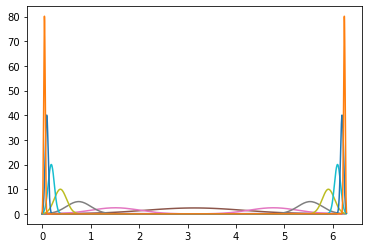

In [32]:
N = 2**15
t = np.linspace(0,64,N)
x = V(t)
ref_c = np.abs(np.fft.fft(x))




for N in [2,4,8,16,32,64,128,256,512,1024,2048,4096]:
    t = np.linspace(0,64,N)
    x = V(t)
    c = np.abs(np.fft.fft(x))

    
    frequencias = np.arange(N)*(2*np.pi/N)
    plt.plot(frequencias,c,label = f'N = {N}')
    



3. Represente os coeficientes de Fourier para diferentes amostragens temporais como funçao da frequencia e discuta os resultados comparando com os coeficientes numericamente exactos ($\omega=\omega_n$ na equaçao 1.1)

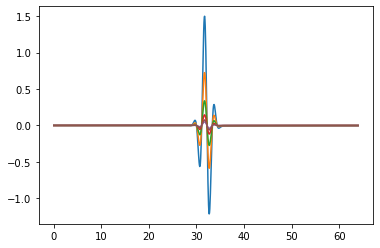

In [99]:
# decomposição LU
from scipy.special import roots_chebyt
import scipy
def LU(A):
    U = A
    N = U[:,0]
    N = len(N)
    L = np.zeros([N,N],complex)
    for m in range(N):
        for p in range(N):
            if p >= m:    
                L[p,m] = U[p,m]
        # Divide by the diagonal element
        div = U[m,m]
        U[m,:] /= div

        # Now subtract from the lower rows
        for i in range(m+1,N):
            mult = U[i,m]
            U[i,:] -= mult*U[m,:]

    
    return L , U

# solução LU
def solucao_LU(L,U,v):
    L = np.copy(L)
    U = np.copy(U)
    N = len(v)
    y = np.empty(N,complex)
    for n in range(N):
        y[n] = v[n]/L[n,n]
        for j in range(n):
            y[n] -= L[n,j]*y[j]/L[n,n]
        # Backsubstitution
    x = np.empty(N,complex)
    for m in range(N-1,-1,-1):
        x[m] = y[m]
        for i in range(m+1,N):
            x[m] -= U[m,i]*x[i]
    return x


# ---> Gauss-Chebyshev <---
def gauss_che(f,a,b,nc):
    xc, wc = roots_chebyt(nc)
    xpc = 0.5 * (b - a) * xc + 0.5 * (b + a)
    wpc = 0.5 * (b - a) * wc

    # Calculando a integral usando a regra de Gauss-Chebyshev
    sc = np.sum(f(xpc) * wpc)
    return sc
 
    
def V(t):
    V_0 = 1
    T = 64
    Omega = 3
    return V_0*np.exp(-((t - (T/2))**2)/2)*np.cos(Omega*t)*np.exp(-1j*w)

# vou considerar w nessas unidade = 1
# e V(w) = 1 também
R = 1
L = 1
c = 1
w = 1
n = 5
matriz = circ(n)
L,U = LU(matriz.matrix)
T = np.linspace(0,64,1000)
i_guard = np.zeros([n+1,len(T)],complex)
for i,t in enumerate(T):
    v = np.zeros(n + 1,complex)
    v[0] =   gauss_che(V, 0, t, 1000)
    I = solucao_LU(L,U,v)
    i_guard[:,i] = I

for i in range (n+1):
    plt.plot(T,np.real(i_guard[i,:]))

4. Calcule cada uma das correntes no tempo $I_n(t)$, como resposta á diferença de potencial $V(t)$ e explique detalhadamente o procedimento usado. Assuma que a componente de frequencia nula das correntes é zero.

# Exercicio 3

Um corpo de massa M é lançado do solo com uma velocidade inicial de modulo $v_0$ e angulo $\theta$ com a horizontal.

No corpo atua uma força de arrasto de tal modo que a equaçao de movimento é dada por
$$
\frac{d^2\textbf{r}}{dt^2}=-g\textbf{u}_y-\frac{\gamma}{M}||\textbf{V}-\textbf{V}_{ar}(\textbf{r})||(\textbf{V}-\textbf{V}_{ar}(\textbf{r}))+e^{-10^6y}\textbf{u}_y
$$
onde $\textbf{V}$ é o vector velocidade, com $\gamma /M=0.4m^{-1}$, $g=9.8ms^{-2}$ e $\textbf{V}_ar$ é a velocidade do escoamento do ar, que depende da posiçao de acordo com,
$$
\textbf{V}_{ar}(x,y)=
\begin{cases}
v_r\left(\frac{y}{y_r}\right)^{1/7}\textbf{u}_x \text{ }\text{se $y>0$}\\
0 \text{ } \text{caso contrario }
\end{cases}
$$
com a velocidade de referencia, $v_r=10ms^{-1}$ a uma altura de $y_r=0.5m$. O ultimo termo na equaçao de movimento representa a força respulsiva junto ao solo. O projetil é lanaçado. O projetil é lançado com uma velocidade inicial de 50$ms^{-1}$

1. Calcule a posiçao da massa para $\theta=\pi/4$ e $t=6$ com $\gamma=0$. Analise a dependencia do erro introduzido com o metodo de RK4 como funçao de h

2. Reperesente a trajetoria para valores do angulo $0<\theta<\pi$ para $0\leq t < 10$ s.

3. Para as trajetorias da questao anterior calcule o trabalho exercicido pela força de arrasto ao longo da trajetoria e pela força de contacto com o solo. Verifique o teorema das forças vivas(ou da energia cinetia) considerando que a massa é $M=1$. Use o metodo de Simpson para efetuar a integraçao.

4. Determine todos os angulos $\theta$ para os quais a primeira colisao com o solo ocorre em $x=10$ m.